# Worksheet 1 

## Girls in Data Science Camp

In this worksheet, we will be using a data set obtained from the Spotify Web API the top 50 tracks from 2023 (more details can be found [here](https://www.kaggle.com/datasets/yukawithdata/spotify-top-tracks-2023)).

<img src=https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_RGB_Green.png width="500">

I have reduced the data set to include the following variables:

- artist_name: the artist name
- track_name: the title of the track
- album_release_date: The date when the track was released
- genres: A list of genres associated with the track's artist(s)
- danceability: A measure from 0.0 to 1.0 indicating how suitable a track is for dancing based on a combination of musical elements
- energy: A measure from 0.0 to 1.0 representing a perceptual measure of intensity and activity
- loudness: The overall loudness of a track in decibels (dB)
- key: The key the track is in. Integers map to pitches using standard Pitch Class notation.
- tempo: The overall estimated tempo of a track in beats per minute (BPM)
- duration_ms: The length of the track in milliseconds
- time_signature: An estimated overall time signature of a track
- popularity: A score between 0 and 100, with 100 being the most popular

I also included a new variable called `pop` which is yes if the song falls into any type of pop genre and no otherwise. 

In [1]:
# Load libraries

library(tidyverse)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ─────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Read in the data

spotify <- read_csv("data/spotify_top_50_2023.csv")

Rows: 50 Columns: 12


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): artist_name, track_name, genres
dbl  (8): danceability, energy, loudness, key, tempo, duration_ms, time_sign...
date (1): album_release_date



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Create 'pop' column 

spotify <- spotify |> 
                mutate(pop = if_else(str_detect(genres, "pop"), "yes", "no"))

In [4]:
head(spotify)

artist_name,track_name,album_release_date,genres,danceability,energy,loudness,key,tempo,duration_ms,time_signature,popularity,pop
<chr>,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Miley Cyrus,Flowers,2023-08-18,['pop'],0.706,0.691,-4.775,0,118.048,200600,4,94,yes
SZA,Kill Bill,2022-12-08,"['pop', 'r&b', 'rap']",0.644,0.735,-5.747,8,88.980,153947,4,86,yes
Harry Styles,As It Was,2022-05-20,['pop'],0.520,0.731,-5.338,6,173.930,167303,4,95,yes
Jung Kook,Seven (feat. Latto) (Explicit Ver.),2023-11-03,['k-pop'],0.790,0.831,-4.185,11,124.987,183551,4,90,yes
Eslabon Armado,Ella Baila Sola,2023-04-28,"['corrido', 'corridos tumbados', 'sad sierreno', 'sierreno']",0.668,0.758,-5.176,5,147.989,165671,3,86,no
Taylor Swift,Cruel Summer,2019-08-23,['pop'],0.552,0.702,-5.707,9,169.994,178427,4,99,yes


# Exercise 1: Wrangling 

## 1.1 

Is the spotify data tidy? Why or why not?

> Answer: The data set is mostly tidy: each row corresponds to a single observation and each column corresponds to a single variable. However, each cell does not always correspond to a single value. For example, the genres column sometimes displays multiple genres per song (e.g., the song "Kill Bill" is clsasified as three genres: pop, r&b and rap).

## 1.2 

What are the dimensions of this data set (i.e., the number of rows and columns)?

In [5]:
dim(spotify) 

[1] 50 13

## 1.3 

Without examining the entire data set, which artist and track is in the 35th row of the data set? Note that your code should return only the required variables (`artist_name` and `track_name`). 

In [6]:
spotify |> 
    slice(35) |>
    select(artist_name, track_name)

artist_name,track_name
<chr>,<chr>
Doja Cat,Paint The Town Red


## 1.4 

Create a subset of the data that only includes tracks with a popularity score over 90. Assign this to an object called `pop_90`. How many songs have a popularity score over 90?

In [7]:
pop_90 <- spotify |> 
            filter(popularity > 90)

pop_90

artist_name,track_name,album_release_date,genres,danceability,energy,loudness,key,tempo,duration_ms,time_signature,popularity,pop
<chr>,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Miley Cyrus,Flowers,2023-08-18,['pop'],0.706,0.691,-4.775,0,118.048,200600,4,94,yes
Harry Styles,As It Was,2022-05-20,['pop'],0.520,0.731,-5.338,6,173.930,167303,4,95,yes
Taylor Swift,Cruel Summer,2019-08-23,['pop'],0.552,0.702,-5.707,9,169.994,178427,4,99,yes
Metro Boomin,Creepin' (with The Weeknd & 21 Savage),2022-12-02,['rap'],0.715,0.620,-6.005,1,97.950,221520,4,91,no
Taylor Swift,Anti-Hero,2022-10-21,['pop'],0.637,0.643,-6.571,4,97.008,200690,4,92,yes
Arctic Monkeys,I Wanna Be Yours,2013-09-09,"['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie']",0.464,0.417,-9.345,0,67.528,183956,4,96,no
David Guetta,I'm Good (Blue),2022-08-26,"['big room', 'dance pop', 'edm', 'pop', 'pop dance']",0.561,0.965,-3.673,7,128.040,175238,4,92,yes
David Kushner,Daylight,2023-04-14,"['gen z singer-songwriter', 'singer-songwriter pop']",0.508,0.430,-9.475,2,130.090,212954,4,94,yes
The Weeknd,Starboy,2016-11-25,"['canadian contemporary r&b', 'canadian pop', 'pop']",0.679,0.587,-7.015,7,186.003,230453,4,95,yes


In [8]:
nrow(pop_90) 

[1] 20

> 20 tracks have a popularity score over 90.

## 1.5

Now, I want to look at pop songs that have a danceability score over 0.7. Create a subset of the `spotify` data set to achieve this task, ordered from highest to lowest danceability. 

In [9]:
spotify |>
    filter(danceability > 0.7 & pop == "yes") |> 
    arrange(by = desc(danceability))

artist_name,track_name,album_release_date,genres,danceability,energy,loudness,key,tempo,duration_ms,time_signature,popularity,pop
<chr>,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Ozuna,Hey Mor,2022-10-07,"['puerto rican pop', 'reggaeton', 'trap latino', 'urbano latino']",0.901,0.589,-6.713,1,98.002,196600,4,87,yes
Doja Cat,Paint The Town Red,2023-09-20,"['dance pop', 'pop']",0.864,0.556,-7.683,2,99.974,230480,4,93,yes
Feid,CLASSY 101,2023-03-31,"['colombian pop', 'pop reggaeton', 'reggaeton', 'reggaeton colombiano', 'trap latino', 'urbano latino']",0.859,0.658,-4.790,11,100.065,195987,4,87,yes
Manuel Turizo,La Bachata,2023-03-17,"['colombian pop', 'latin pop', 'reggaeton', 'reggaeton colombiano', 'trap latino', 'urbano latino']",0.835,0.679,-5.329,7,124.980,162638,4,85,yes
NewJeans,OMG,2023-01-02,"['k-pop', 'k-pop girl group']",0.804,0.771,-4.067,9,126.956,212253,4,87,yes
Rema,Calm Down (with Selena Gomez),2023-04-27,"['afrobeats', 'nigerian pop']",0.799,0.802,-5.196,11,107.008,239318,4,90,yes
Jung Kook,Seven (feat. Latto) (Explicit Ver.),2023-11-03,['k-pop'],0.790,0.831,-4.185,11,124.987,183551,4,90,yes
FIFTY FIFTY,Cupid - Twin Ver.,2023-09-22,['k-pop girl group'],0.783,0.592,-8.332,11,120.018,174253,4,75,yes
Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",2023-01-11,"['argentine hip hop', 'pop venezolano', 'trap argentino', 'trap latino', 'urbano latino']",0.778,0.632,-5.600,2,122.104,218289,4,85,yes


## 1.6

What is the average danceability score for Taylor Swift songs? 

In [10]:
# Filter for only Taylor Swift songs
spotify |>
    filter(artist_name == "Taylor Swift") 

artist_name,track_name,album_release_date,genres,danceability,energy,loudness,key,tempo,duration_ms,time_signature,popularity,pop
<chr>,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Taylor Swift,Cruel Summer,2019-08-23,['pop'],0.552,0.702,-5.707,9,169.994,178427,4,99,yes
Taylor Swift,Anti-Hero,2022-10-21,['pop'],0.637,0.643,-6.571,4,97.008,200690,4,92,yes
Taylor Swift,Blank Space,2014-10-27,['pop'],0.753,0.678,-5.421,5,96.006,231827,4,78,yes


In [11]:
# Compute the average danceability score using `summarize`
spotify |>
    filter(artist_name == "Taylor Swift") |>
    summarize(avg_dance_TS = mean(danceability))

avg_dance_TS
<dbl>
0.6473333


## 1.7

Are Taylor Swfit's songs more danceable than The Weekend's? *Hint: use `group_by`*.

In [12]:
spotify |>
     group_by(artist_name) |>
     summarize(avg_dance = mean(danceability)) |> 
     filter(artist_name == "Taylor Swift" | artist_name == "The Weeknd")

artist_name,avg_dance
<chr>,<dbl>
Taylor Swift,0.6473333
The Weeknd,0.5885000


## 1.8 

Are pop songs more popular than other genres? Compare the average popularity scores between pop songs vs. other genres.

In [13]:
spotify |>
     group_by(pop) |>
     summarize(avg_popularity = mean(popularity))

pop,avg_popularity
<chr>,<dbl>
no,87.75000
yes,88.26471


# Exercise 2: Data Visualization

## 2.1 

Using a histogram, visualize the distribution of popularity scores for Spotify's top 50 tracks from 2023. Describe what you see. 

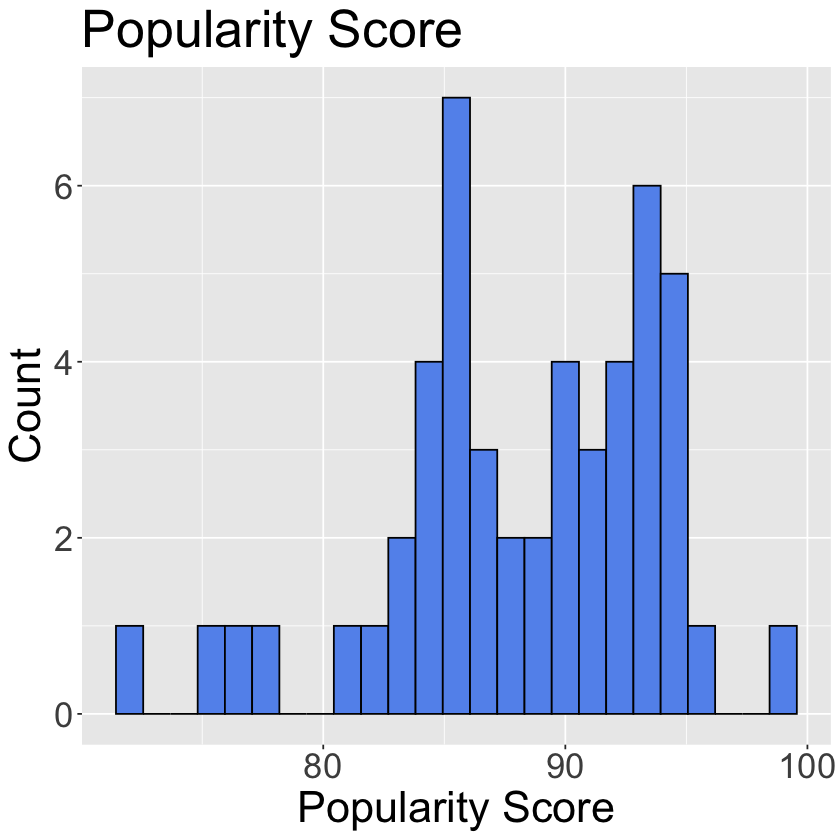

In [14]:
ggplot(spotify, aes(x = popularity)) +
    geom_histogram(bins=25, fill = "cornflowerblue", color = "black") + 
    theme(text = element_text(size = 26)) + # increase text size
    labs(x='Popularity Score', y='Count', title='Popularity Score')

> The popularity scores are distributed from about 72-99, with two main points of concentration around approximately 85 and 95.

## 2.2 

Are pop songs more popular than other genres? You answered this in question 1.8 using summary statistics, but now use histograms to visualize the popularity groups for the two groups on the same graph. Do you notice anything different?

> Hint: use `facet_grid`

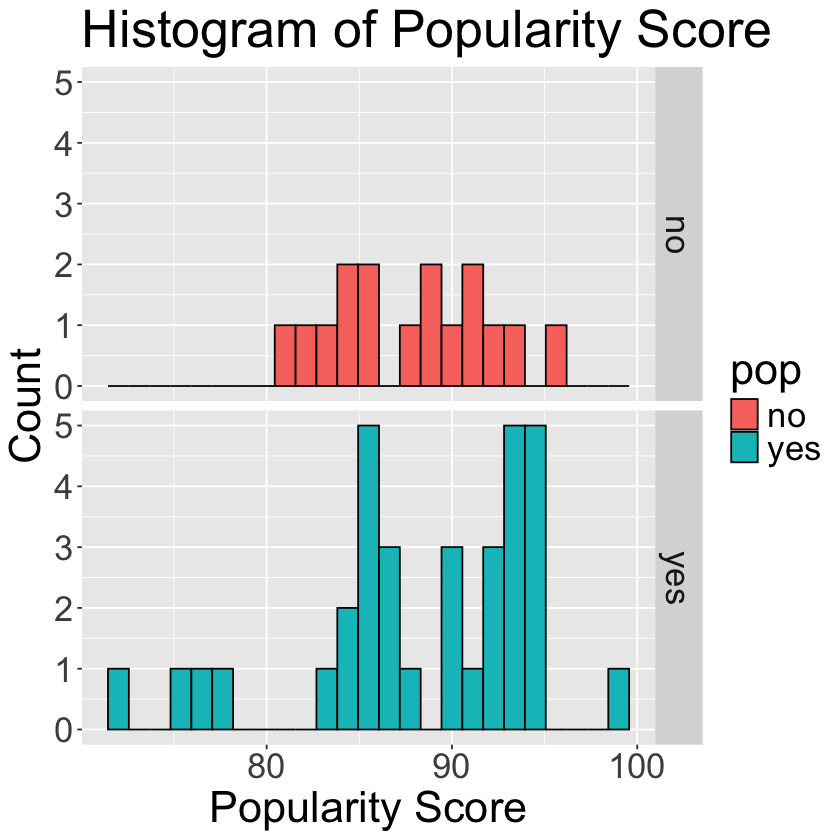

In [15]:
ggplot(spotify, aes(x = popularity, fill = pop)) +
    geom_histogram(bins=25, color = "black") +
    facet_grid(rows = vars(pop)) +
    theme(text = element_text(size = 26)) +
    labs(x='Popularity Score', y='Count', title='Histogram of Popularity Score ')

> While the center of the two distributions are very similar (both around 88), we can see that the distribution of popularity scores for pop songs has more variability and a wider spread than songs that are not classified as pop. 

## 2.3 

Create a barplot comparing the counts of pop songs vs. non-pop songs.

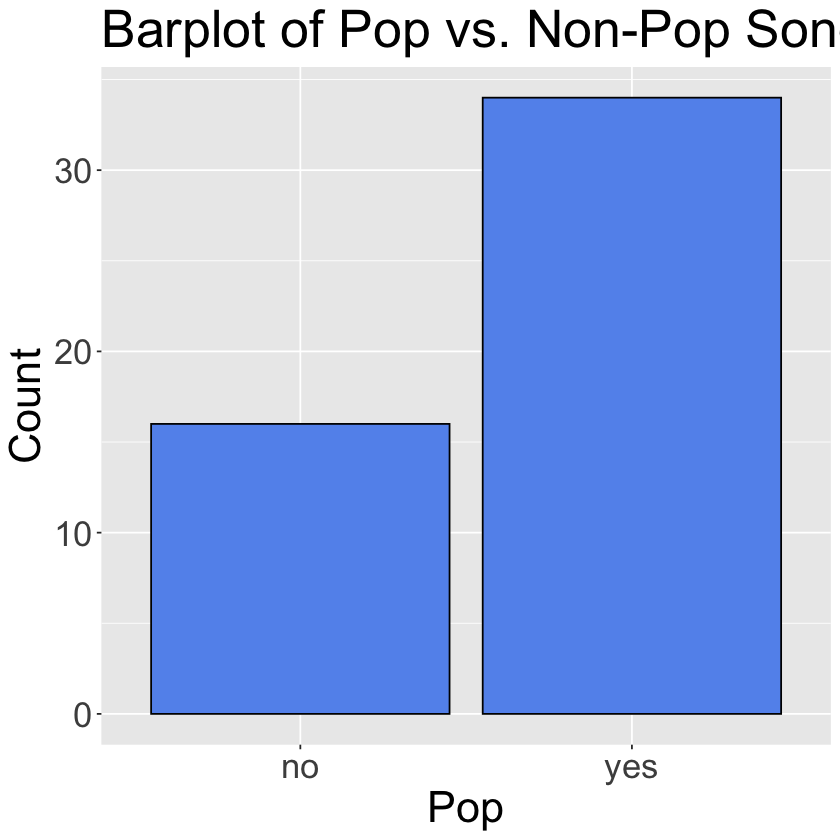

In [16]:
ggplot(spotify, aes(x = pop)) +
    geom_bar(fill = "cornflowerblue", color = "black") +
    theme(text = element_text(size = 26)) + 
    labs(x = 'Pop', y = 'Count', title = 'Barplot of Pop vs. Non-Pop Songs') 
  

## 2.4 

Is there a relationship between how loud a song is in decibels and its popularity? Visualize the relationship between loudness and popularity with a scatterplot, plotting loudness on the $y$-axis and popularity on the $x$-axis. What do you notice?

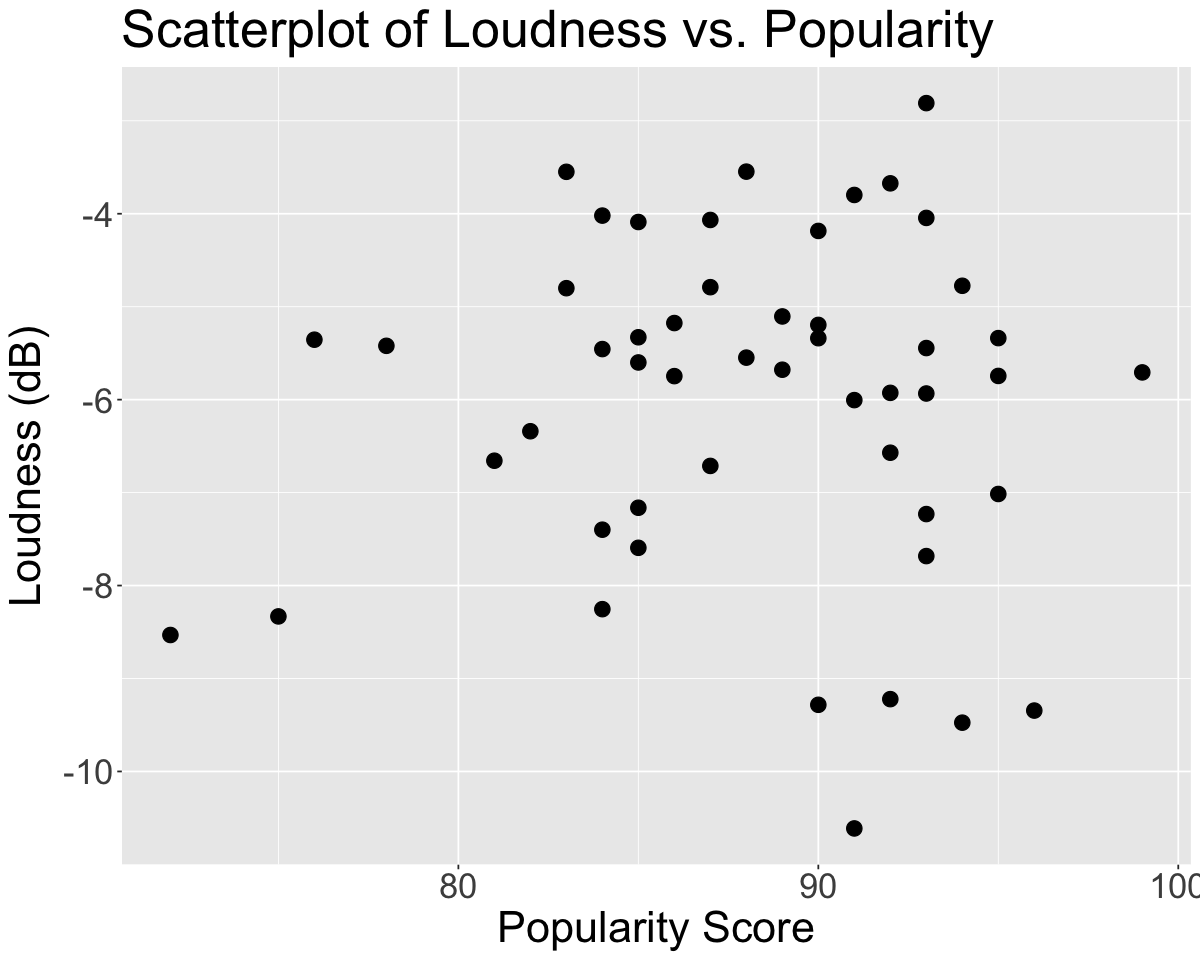

In [17]:
options(repr.plot.width = 10, repr.plot.height = 8)

ggplot(spotify, aes(x = popularity, y = loudness)) + 
    geom_point(size=4) +
    theme(text = element_text(size = 26)) + 
    labs(x='Popularity Score', y='Loudness (dB)',title='Scatterplot of Loudness vs. Popularity') # rename axes and add title

> It seems like there is a relatively weak positive relationship between loudness and popularity score.

## 2.5 (Challenge)

Find the song that has the highest popularity score, but a relatively moderate loudness. Highlight the point on the graph and label it. 

> Hint: Use the `annotate` function to highlight a point

In [18]:
spotify |> 
    arrange(desc(popularity)) |>
    slice(1) |>
    select(artist_name, track_name, popularity, loudness)

artist_name,track_name,popularity,loudness
<chr>,<chr>,<dbl>,<dbl>
Taylor Swift,Cruel Summer,99,-5.707


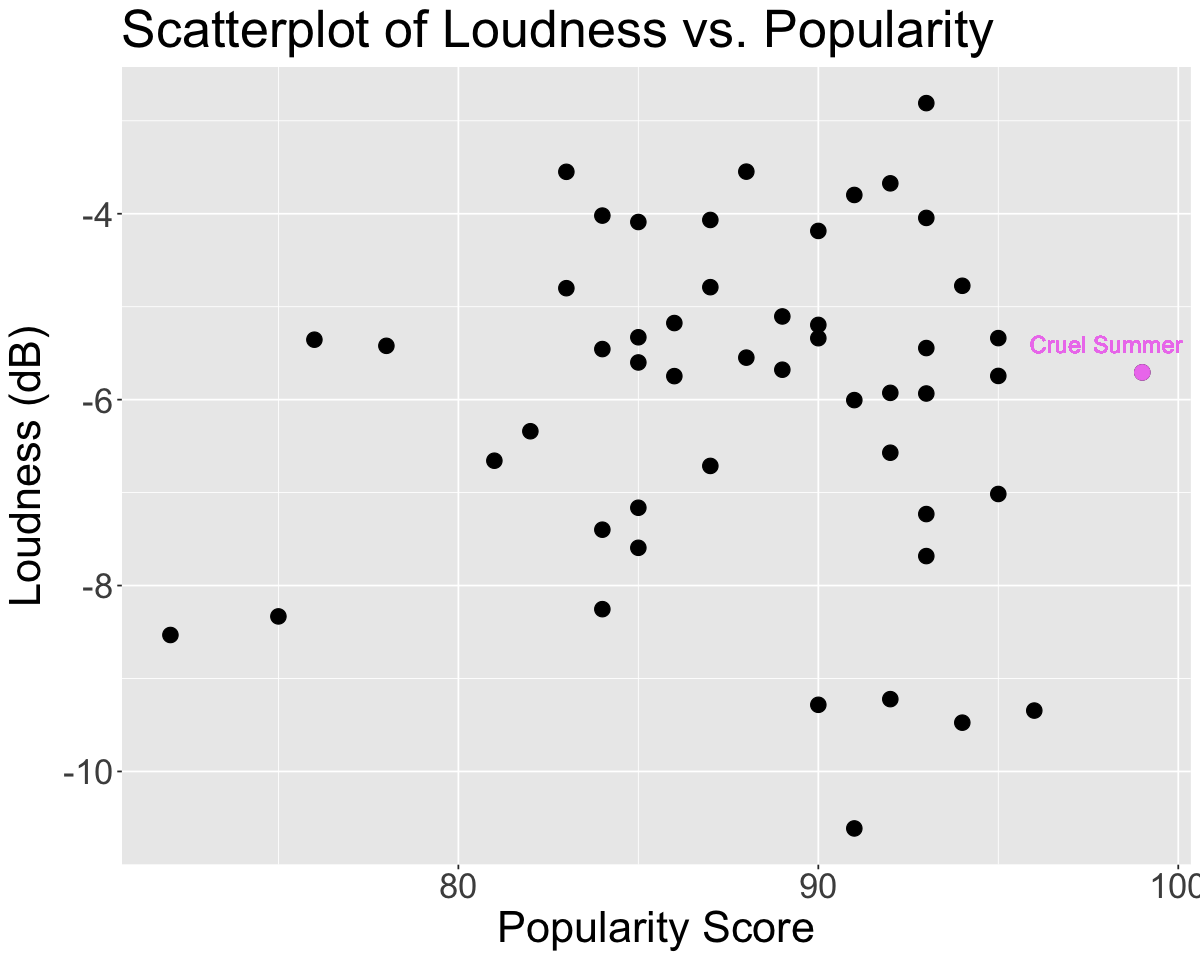

In [19]:
options(repr.plot.width = 10, repr.plot.height = 8)

ggplot(spotify, aes(x = popularity, y = loudness)) + 
    geom_point(size=4) +
    annotate("point", x = 99, y = -5.707, color = 'violet', size = 4) + 
    geom_text(x = 98, y = -5.4 , label = "Cruel Summer", color = "violet", size = 5) + # add text to plot
    theme(text = element_text(size = 26)) + 
    labs(x='Popularity Score', y='Loudness (dB)',title='Scatterplot of Loudness vs. Popularity') # rename axes and add title

## 2.6 (Challenge)

List the artists who have more than one track in the top 50. For each artist, show the number of tracks and their average popularity score.

In [20]:
popular_artists <- spotify |>
    group_by(artist_name) |> 
    summarize(track_count = n(), avg_popularity = mean(popularity)) |>
    filter(track_count > 1)

popular_artists

artist_name,track_count,avg_popularity
<chr>,<int>,<dbl>
Bad Bunny,2,86.50000
Bizarrap,2,86.50000
SZA,2,89.50000
Taylor Swift,3,89.66667
The Weeknd,4,89.50000
d4vd,2,90.50000
